<a href="https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/andssuu/moncattle.git

Cloning into 'moncattle'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 339 (delta 168), reused 129 (delta 54), pack-reused 0
Receiving objects: 100% (339/339), 3.19 MiB | 6.77 MiB/s, done.
Resolving deltas: 100% (168/168), done.


## Dados dos experimentos

* 2 períodos: primeiro de 25/03/15 a 30/03/15 e de 06/04/15 a 09/04/15
* 4 animais (3 distintos)
* Foram utilizadas 4 coleiras (A, B, C e D). Entretanto, houve algumas falhas durante o experimento e, no final, ficaram as seguintes bases:
  - A2 e A3
  - B2 e B3
  - C3 e C4
  - D1, D2, D3 e D4
* Sensores: acelerômetro, giroscópio, magnetômetro e GPS
* As coletas eram feitas a cada 1 segundo para todos os sensores
* Carregamento offline dos dados por um cartão SD
* Classes de comportamentos: pastar, em pé, deitado e andando
    * **Pastando/Procurando**: caracterizado pelo animal sobre as quatros patas, com a cabeça baixa procurando ou mastigando o capim. O animal pode ou não estar em movimento, já que ele pode estar se deslocando à procura de capim;
    * **Andando**: o animal também está sobre as quatros patas, porém com o pescoço reto (apontando o fucinho para frente) e se deslocando pela área de pasto;
    * **Em Pé**: o animal está sobre as quatro patas, com a cabeça erguida e não há deslocamento;
    * **Deitado**: o animal está com as patas abaixadas e com a barriga tocando o solo.

## Base de Dados

O arquivo lomba.csv contém todos os dados aglutinados que foram utilizados. A estrutura de cabeçalho é definida da seguinte forma:

IdColar | AccX | AccY | AccZ | MagX | MagY | MagZ | GirX | GirY | GirZ | Horario | Data | VelocidadeDeslocamento | Comportamento 
 --- | --- | --- |--- |--- |--- |--- |--- |--- |--- |--- |---|---|---
A2 | -11889 | 11184 | -17877 | -1280 | -73 | -309 | -4013 | 1260 | -31 | 131911.203 | 250515 | 000.0 | Comendo/Procurando
A2 | -9144 | 8945 | -11799 | -1213 | 707 | -238 | -394 | 2278 | -602 | 131949.203 | 250515 | 000.0 | Comendo/Procurando
A2 | 6391 | 9265 | -11767 | 570 | -405 | -1533 | -1072 | -1094 | 1854 | 132148.203 | 250515 | 000.0 | EmPe
A2 | -1394 | 10206 | -13229 | 671 | -73 | -1590 | 287 | 2253 | -2760 | 132151.203 | 250515 | 000.0 | Comendo/Procurando
...| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... 
D4 | 2152 | 7619 | -7736 | -1650 | 788 | 43 | -2980 | 3678 | -1357 | 122529.111 | 040715 | 000.0 | Comendo/Procurando


No total há 13088 amostras. A tabela a seguir mostra a segmentação das amostras por coleira

A2 | A3 | B2 | B3 | C3 | C4 | D1 | D2 | D3 | D4 | Total
--- | --- | --- |--- |--- |--- |--- |--- |--- |--- |--- | 
1112 | 2033 | 1131 | 1735 | 1852 | 406 | 1126 | 1690 | 1598 | 405 | 13088


In [3]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("moncattle/data/lomba.csv", float_precision='high')
df.head()

,id_colar,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z,horario,data,velocidade_deslocamento,comportamento
0,A2,-11889,11184,-17877,-1280,-73,-309,-4013,1260,-31,131911.203,250515,0.0,Pastando
1,A2,-9144,8945,-11799,-1213,707,-238,-394,2278,-602,131949.203,250515,0.0,Pastando
2,A2,6391,9265,-11767,570,-405,-1533,-1072,-1094,1854,132148.203,250515,0.0,EmPe
3,A2,-1394,10206,-13229,671,-73,-1590,287,2253,-2760,132151.203,250515,0.0,Pastando
4,A2,-4864,5953,-10472,-84,-200,-1767,-7101,9206,-3595,132154.203,250515,0.0,Pastando


## Visualização dos Dados

[5732, 1229, 3736, 2391]

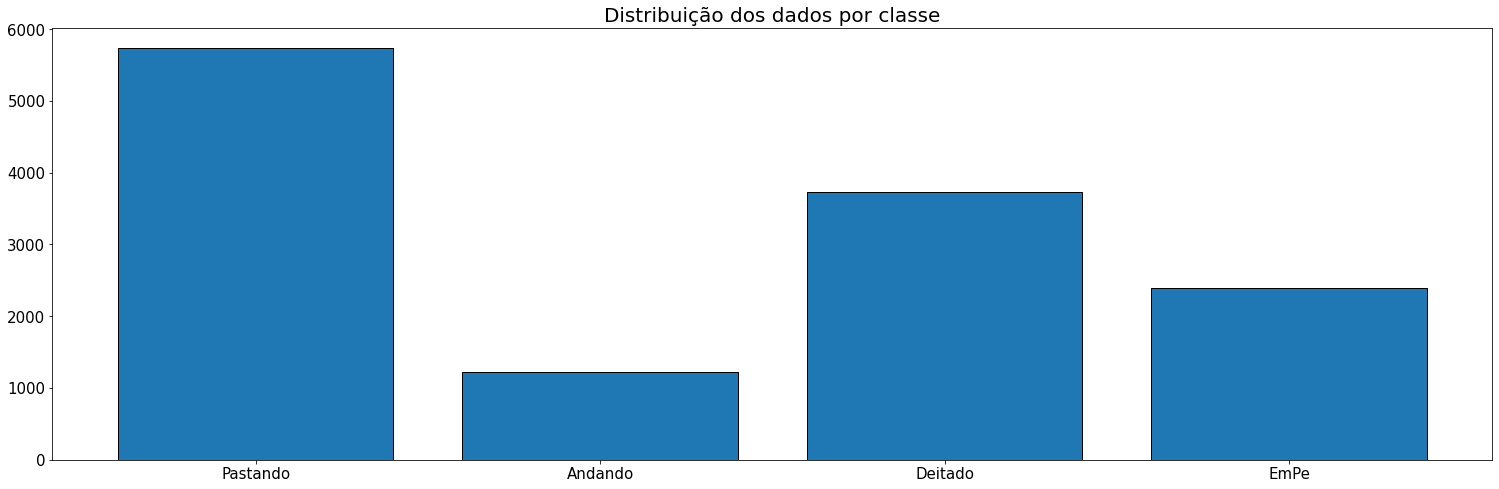

In [26]:
fig = plt.figure(figsize=(20, 6))
plt.rcParams.update({'font.size': 15})
ax = fig.add_axes([0,1,1,1])
comportamentos = list(set(df.comportamento.values))
ax.set_title('Distribuição dos dados por classe', fontsize=20)
count_list = [sum(df.comportamento==comportamento) for comportamento in comportamentos]
ax.bar(comportamentos, count_list, edgecolor='black')
count_list

# Extração de Características

In [14]:
data = df[df.columns[1:10]]
data_normalized = (data - data.min()) / (data.max() - data.min())
#data_normalized =  (data-data.mean())/data.std()
labels = df[df.columns[-1]]
data.head()

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z
0,-11889,11184,-17877,-1280,-73,-309,-4013,1260,-31
1,-9144,8945,-11799,-1213,707,-238,-394,2278,-602
2,6391,9265,-11767,570,-405,-1533,-1072,-1094,1854
3,-1394,10206,-13229,671,-73,-1590,287,2253,-2760
4,-4864,5953,-10472,-84,-200,-1767,-7101,9206,-3595


In [10]:
data_normalized.head()

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z
0,0.334605,0.661770,0.244090,0.173799,0.335664,0.439289,0.418168,0.451028,0.499557
1,0.378613,0.626671,0.345635,0.191389,0.523752,0.460681,0.475423,0.468785,0.490844
2,0.627671,0.631688,0.346170,0.659491,0.255606,0.070503,0.464696,0.409967,0.528322
3,0.502862,0.646439,0.321744,0.686007,0.335664,0.053329,0.486197,0.468349,0.457914
4,0.447230,0.579768,0.367806,0.487792,0.305040,0.000000,0.369314,0.589632,0.445172


## Correlação entre as características (Pearson)

Coeficiente de Correlação	|    Classificação
 --- | --- |
0 < r ≤ \|0,1\|	   |  Nula
\|0,1\| < r ≤ \|0,3\|  |  Fraca
\|0,3\| < r ≤ \|0,6\|  |  Moderada
\|0,6\| < r ≤ \|0,9\|  |  Forte
\|0,9\| < r < \|1\|    |  Muito Forte
r = 1 | Perfeita

In [5]:
data.corr(method ='pearson')

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z
acc_x,1.000000,0.169493,0.387565,0.316316,0.145607,0.276855,0.015686,0.091172,0.060235
acc_y,0.169493,1.000000,0.181807,0.118385,0.092107,-0.031125,-0.113180,0.010879,-0.042215
acc_z,0.387565,0.181807,1.000000,0.112761,0.072062,0.210892,-0.076122,0.115848,-0.019166
mag_x,0.316316,0.118385,0.112761,1.000000,0.100652,0.077900,0.006104,-0.030049,0.013709
mag_y,0.145607,0.092107,0.072062,0.100652,1.000000,0.648286,0.017125,-0.006033,0.012062
mag_z,0.276855,-0.031125,0.210892,0.077900,0.648286,1.000000,0.005991,0.021079,0.008010
giro_x,0.015686,-0.113180,-0.076122,0.006104,0.017125,0.005991,1.000000,-0.095378,0.166848
giro_y,0.091172,0.010879,0.115848,-0.030049,-0.006033,0.021079,-0.095378,1.000000,-0.117356
giro_z,0.060235,-0.042215,-0.019166,0.013709,0.012062,0.008010,0.166848,-0.117356,1.000000


In [24]:
mod_vector = np.sqrt(data.acc_x**2 + data.acc_y**2 + data.acc_z**2)
mod_vector.head()

0    24207.794323
1    17402.360817
2    16283.347168
3    16766.398331
4    12990.746283
dtype: float64

In [30]:
pd.options.mode.chained_assignment = None
data["mod_vector"]=mod_vector
data.head()

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z,mod_vector
0,-11889.0,11184.0,-17877.0,-1280.0,-73.0,-309.0,-4013.0,1260.0,-31.0,24207.794323
1,-9144.0,8945.0,-11799.0,-1213.0,707.0,-238.0,-394.0,2278.0,-602.0,17402.360817
2,6391.0,9265.0,-11767.0,570.0,-405.0,-1533.0,-1072.0,-1094.0,1854.0,16283.347168
3,-1394.0,10206.0,-13229.0,671.0,-73.0,-1590.0,287.0,2253.0,-2760.0,16766.398331
4,-4864.0,5953.0,-10472.0,-84.0,-200.0,-1767.0,-7101.0,9206.0,-3595.0,12990.746283


In [31]:
data.corr(method ='pearson')

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z,mod_vector
acc_x,1.000000,0.169493,0.387565,0.316316,0.145607,0.276855,0.015686,0.091172,0.060235,-0.281179
acc_y,0.169493,1.000000,0.181807,0.118385,0.092107,-0.031125,-0.113180,0.010879,-0.042215,0.371789
acc_z,0.387565,0.181807,1.000000,0.112761,0.072062,0.210892,-0.076122,0.115848,-0.019166,-0.552125
mag_x,0.316316,0.118385,0.112761,1.000000,0.100652,0.077900,0.006104,-0.030049,0.013709,0.018774
mag_y,0.145607,0.092107,0.072062,0.100652,1.000000,0.648286,0.017125,-0.006033,0.012062,0.053393
mag_z,0.276855,-0.031125,0.210892,0.077900,0.648286,1.000000,0.005991,0.021079,0.008010,-0.050733
giro_x,0.015686,-0.113180,-0.076122,0.006104,0.017125,0.005991,1.000000,-0.095378,0.166848,0.018910
giro_y,0.091172,0.010879,0.115848,-0.030049,-0.006033,0.021079,-0.095378,1.000000,-0.117356,-0.150566
giro_z,0.060235,-0.042215,-0.019166,0.013709,0.012062,0.008010,0.166848,-0.117356,1.000000,-0.045548
mod_vector,-0.281179,0.371789,-0.552125,0.018774,0.053393,-0.050733,0.018910,-0.150566,-0.045548,1.000000


## Notebooks Sensores

* [Acelerômetro](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/accelerometer.ipynb)

* [Giroscópio](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/gyroscope.ipynb)

* [Magnetômetro](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/magnetometer.ipynb)



## Comparações Weka

O autor utilizou a ferramenta WEKA para avaliar os modelos. A tabela abaixo contém os dados dos classificadores que obtiveram as melhores acurácias. A última coluna representa as novas acurácias que foram obtidas.

Categoria | Algoritmo | Acurácia (%) | Acurácia² (%) 
--- | --- | --- | ---
trees | Random Forest | 93.9868 | 94.1397
meta | Rotation Forest | 93.7576 | 93.6889
meta | Random Committee | 93.4749 | 93.4597
meta | END | 93,0012 | ---
meta | Bagging | 92,7338 | 92.6956
meta | Decorate | 92,4587 | 92.5733
lazy | IB1 | 91,8627 | 91.8628
lazy | IBk | 91,8627 | 91.8628
trees | J48 graft | 91,4349 | 91.03
meta | Classification Via Regression | 91,4043 | 91.4043

## Algoritmos

* [SOM](https://colab.research.google.com/github/andssuu/moncattle/blob/master/unsupervised/notebooks/som.ipynb)

* [K-Means](https://colab.research.google.com/github/andssuu/moncattle/blob/master/unsupervised/notebooks/k_means.ipynb)

* [MLP](https://colab.research.google.com/github/andssuu/redes_neurais_pos/blob/main/projeto/notebooks/main.ipynb)

* RBF

* SVM


## Links

[Dissertação Luiz Lomba](https://repositorio.ufms.br/jspui/bitstream/123456789/2627/1/LUIZ%20FERNANDO%20DELBONI%20LOMBA.pdf)
